In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [34]:
df = pd.read_csv('../data/processed_weather_data.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Hour,Day,Month,Year,Weekday
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,22,31,3,2006,4
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,23,31,3,2006,4
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0,1,4,2006,5
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1,1,4,2006,5
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2,1,4,2006,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,17,9,9,2016,4
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,18,9,9,2016,4
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,19,9,9,2016,4
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,20,9,9,2016,4


# Preprocessing

In [10]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index('Formatted Date')
df = df.sort_index()

In [11]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Hour,Day,Month,Year,Weekday
Formatted Date,,,,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,Mostly cloudy throughout the day.,23,31,12,2005,5
2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,Mostly cloudy throughout the day.,0,1,1,2006,6
2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,Mostly cloudy throughout the day.,1,1,1,2006,6
2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,Mostly cloudy throughout the day.,2,1,1,2006,6
2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,Mostly cloudy throughout the day.,3,1,1,2006,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03,Mostly cloudy throughout the day.,18,31,12,2016,5
2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27,Mostly cloudy throughout the day.,19,31,12,2016,5
2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50,Mostly cloudy throughout the day.,20,31,12,2016,5


In [12]:
df["Precip Type"].value_counts()

Precip Type
rain    85224
snow    10712
none      517
Name: count, dtype: int64

In [13]:
df_none = df[df["Precip Type"] == "none"]
df_none

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Hour,Day,Month,Year,Weekday
Formatted Date,,,,,,,,,,,,,,,
2012-04-11 14:00:00+00:00,Mostly Cloudy,none,19.016667,19.016667,0.26,14.8764,163.0,9.982,1002.40,Mostly cloudy until night.,14,11,4,2012,2
2012-04-11 16:00:00+00:00,Mostly Cloudy,none,17.850000,17.850000,0.28,13.7977,169.0,9.982,1001.79,Mostly cloudy until night.,16,11,4,2012,2
2012-04-11 17:00:00+00:00,Mostly Cloudy,none,16.322222,16.322222,0.32,10.8192,151.0,9.982,1001.60,Mostly cloudy until night.,17,11,4,2012,2
2012-04-11 19:00:00+00:00,Mostly Cloudy,none,12.566667,12.566667,0.43,9.0160,159.0,9.982,1001.92,Mostly cloudy until night.,19,11,4,2012,2
2012-04-11 20:00:00+00:00,Mostly Cloudy,none,12.927778,12.927778,0.47,17.6295,197.0,16.100,1002.20,Mostly cloudy until night.,20,11,4,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-02 06:00:00+00:00,Mostly Cloudy,none,7.344444,4.372222,0.82,17.1465,307.0,0.000,1020.26,Mostly cloudy until morning.,6,2,11,2016,2
2016-11-02 07:00:00+00:00,Mostly Cloudy,none,7.122222,4.800000,0.83,12.2682,303.0,0.000,1020.52,Mostly cloudy until morning.,7,2,11,2016,2
2016-11-02 08:00:00+00:00,Mostly Cloudy,none,7.250000,5.800000,0.82,7.9695,292.0,0.000,1020.71,Mostly cloudy until morning.,8,2,11,2016,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2005-12-31 23:00:00+00:00 to 2016-12-31 22:00:00+00:00
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      95165 non-null  float64
 9   Daily Summary             96453 non-null  object 
 10  Hour                      96453 non-null  int64  
 11  Day                       96453 non-null  int64  
 12  Month                     96453 non-null  int64  
 13  Year          

# Feature Engineering

In [16]:
df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24.0)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12.0)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12.0)

In [18]:
target = 'Precip Type'

features = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
    'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 
    'Pressure (millibars)', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos'
]

df_model = df[features + [target]].copy()
df_model

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,month_sin,month_cos,Precip Type
Formatted Date,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,-0.258819,9.659258e-01,-2.449294e-16,1.000000,rain
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,0.000000,1.000000e+00,5.000000e-01,0.866025,rain
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,0.258819,9.659258e-01,5.000000e-01,0.866025,rain
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,0.500000,8.660254e-01,5.000000e-01,0.866025,rain
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,0.707107,7.071068e-01,5.000000e-01,0.866025,rain
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,rain
2016-12-31 19:00:00+00:00,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27,-0.965926,2.588190e-01,-2.449294e-16,1.000000,rain
2016-12-31 20:00:00+00:00,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50,-0.866025,5.000000e-01,-2.449294e-16,1.000000,snow


# Chronological Data Split (80% train, 20% test)

In [20]:
split_point = int(len(df_model) * 0.8)
df_train = df_model.iloc[:split_point]
df_test = df_model.iloc[split_point:]

X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

print(f"Total data points: {len(df_model)}")
print(f"Training data points: {len(X_train)}")
print(f"Test data points: {len(X_test)}")

Total data points: 96453
Training data points: 77162
Test data points: 19291


# Create and Train the Model

In [22]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_enc)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
joblib.dump({'model': model, 'label_encoder': le}, '../models/preciptype_forecast_model.joblib')

['../models/preciptype_forecast_model.joblib']

# Evaluate the Model

In [28]:
y_pred_enc = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print(f"Overall Accuracy: {accuracy:.4f}")


--- Model Evaluation ---
Overall Accuracy: 0.9806


# Visualize the Results

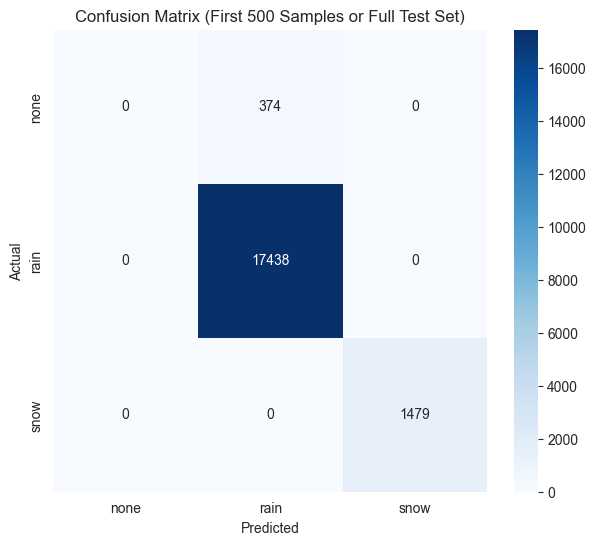

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (First 500 Samples or Full Test Set)')
plt.show()